# Predição de Despesas Médicas do Seguro de Saúde

### Cross-Validation com Pipelines

In [1]:
# %pip install pandas numpy matplotlib seaborn scikit-learn
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:

# Carregamento dos dados
df = pd.read_csv("penguins.csv")

# Exibição das primeiras linhas e informações do dataset
print(df.head())
print(df.info())

  studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion  Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3  Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \


In [5]:
# Estatísticas descritivas
print(df.describe())

       Sample Number  Culmen Length (mm)  Culmen Depth (mm)  \
count     344.000000          342.000000         342.000000   
mean       63.151163           43.921930          17.151170   
std        40.430199            5.459584           1.974793   
min         1.000000           32.100000          13.100000   
25%        29.000000           39.225000          15.600000   
50%        58.000000           44.450000          17.300000   
75%        95.250000           48.500000          18.700000   
max       152.000000           59.600000          21.500000   

       Flipper Length (mm)  Body Mass (g)  Delta 15 N (o/oo)  \
count           342.000000     342.000000         330.000000   
mean            200.915205    4201.754386           8.733382   
std              14.061714     801.954536           0.551770   
min             172.000000    2700.000000           7.632200   
25%             190.000000    3550.000000           8.299890   
50%             197.000000    4050.000000       

In [6]:
# Verificando valores ausentes
print(df.isnull().sum())

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64


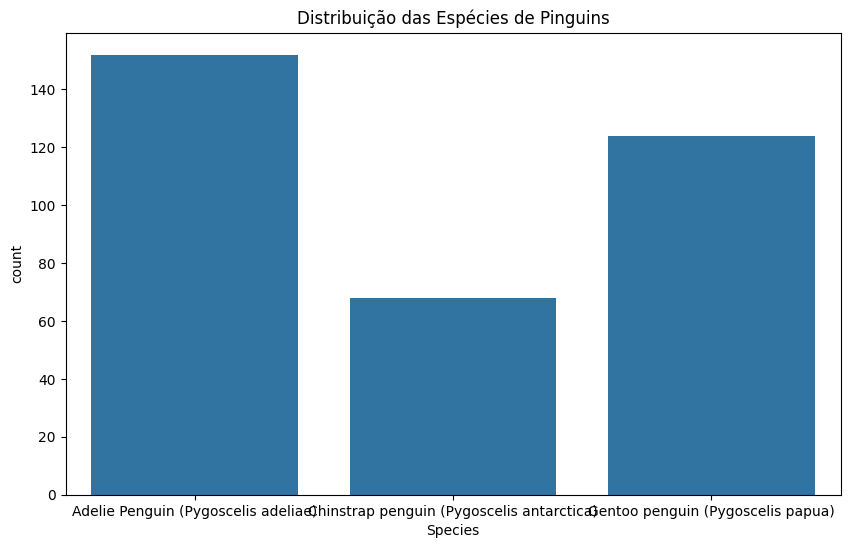

In [7]:
# Distribuição das espécies
plt.figure(figsize=(10, 6))
sns.countplot(x='Species', data=df)
plt.title('Distribuição das Espécies de Pinguins')
plt.show()

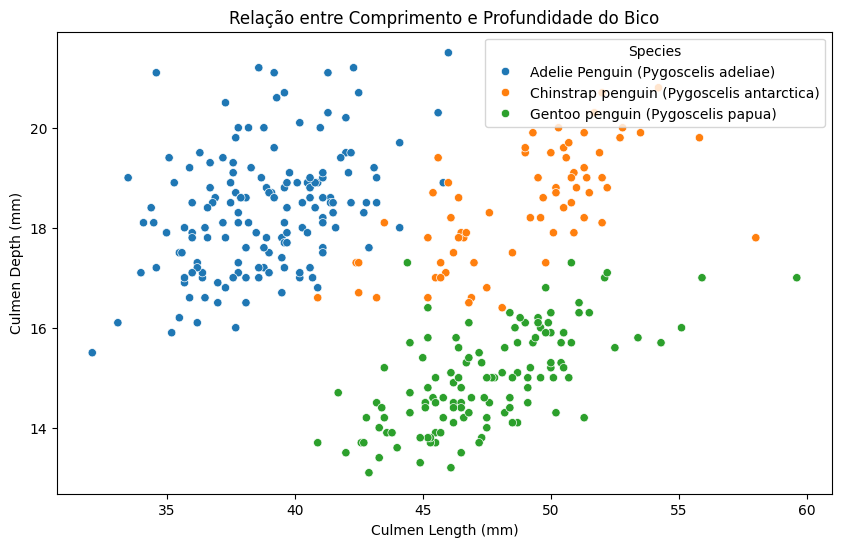

In [8]:
# Relação entre comprimento e profundidade do bico
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Culmen Length (mm)', y='Culmen Depth (mm)',
                hue='Species', data=df)
plt.title('Relação entre Comprimento e Profundidade do Bico')
plt.show()

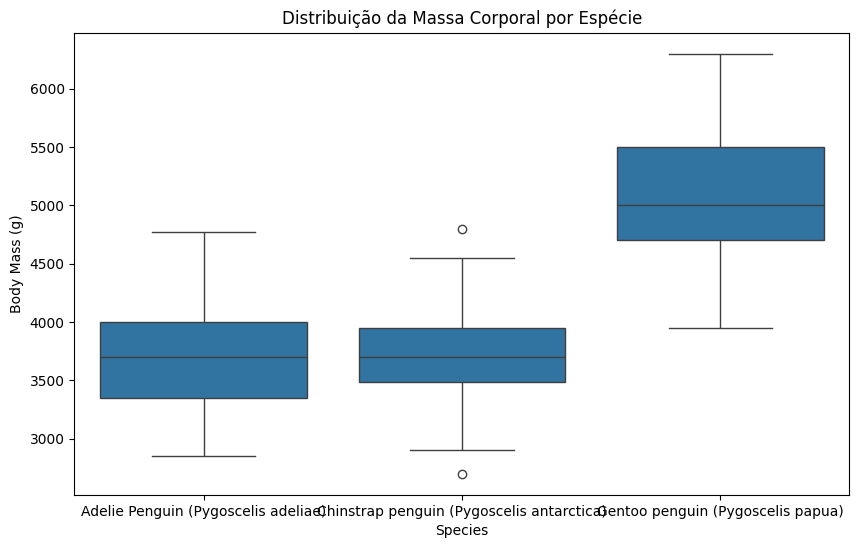

In [9]:
# Distribuição da massa corporal por espécie
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='Body Mass (g)', data=df)
plt.title('Distribuição da Massa Corporal por Espécie')
plt.show()

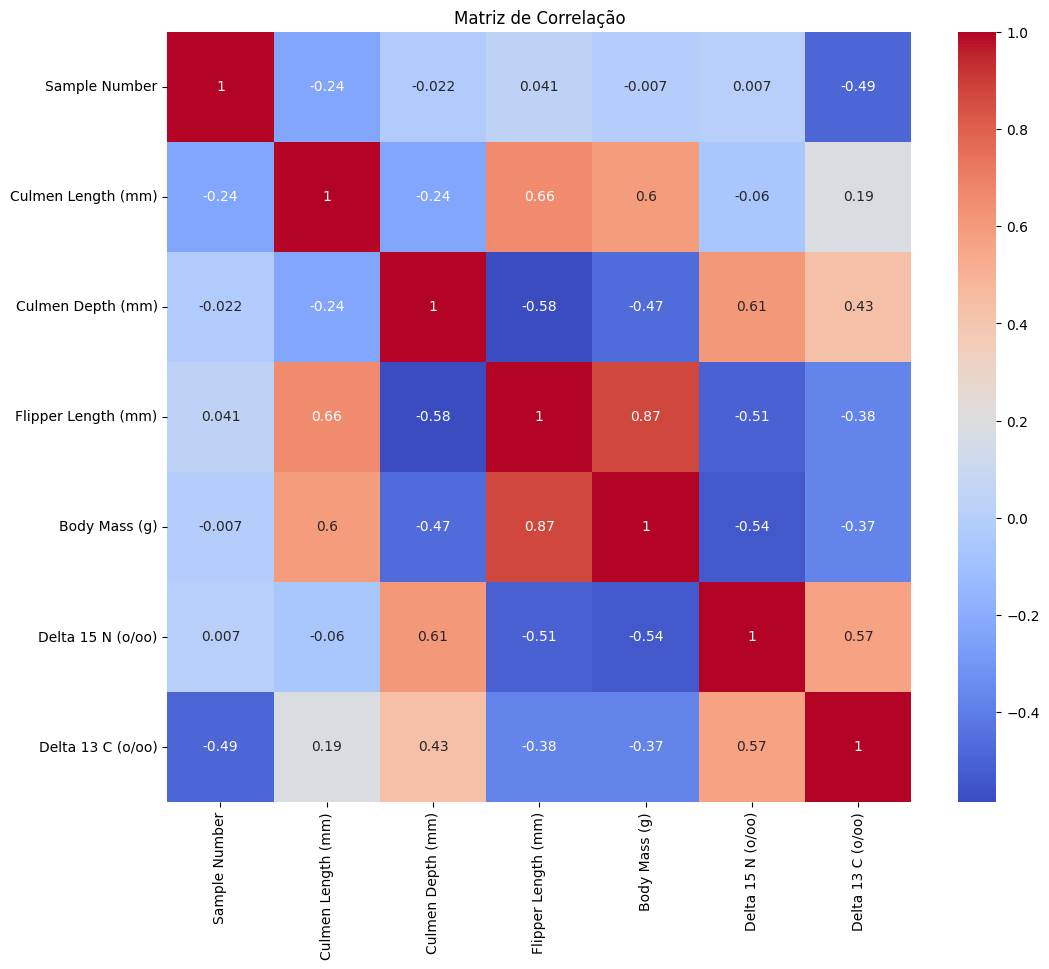

In [10]:
# Matriz de correlação
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [11]:
X = df.drop(['Species'], axis=1)
y = df['Species']

# Dividindo em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Criando pipelines para pré-processamento
numeric_features = ['Culmen Length (mm)',
                    'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']
categorical_features = ['Island', 'Sex']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [12]:
# Criando o pipeline completo com o modelo
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

In [13]:
# Treinando o modelo
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Culmen Length (mm)',
                                                   'Culmen Depth (mm)',
                                                   'Flipper Length (mm)',
                                                   'Body Mass (g)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Island', 'Sex'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [14]:
# Fazendo previsões
y_pred = model.predict(X_test)

In [15]:
# Avaliando o modelo
print(classification_report(y_test, y_pred))

                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       0.97      1.00      0.98        32
Chinstrap penguin (Pygoscelis antarctica)       1.00      0.94      0.97        16
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00        21

                                 accuracy                           0.99        69
                                macro avg       0.99      0.98      0.98        69
                             weighted avg       0.99      0.99      0.99        69



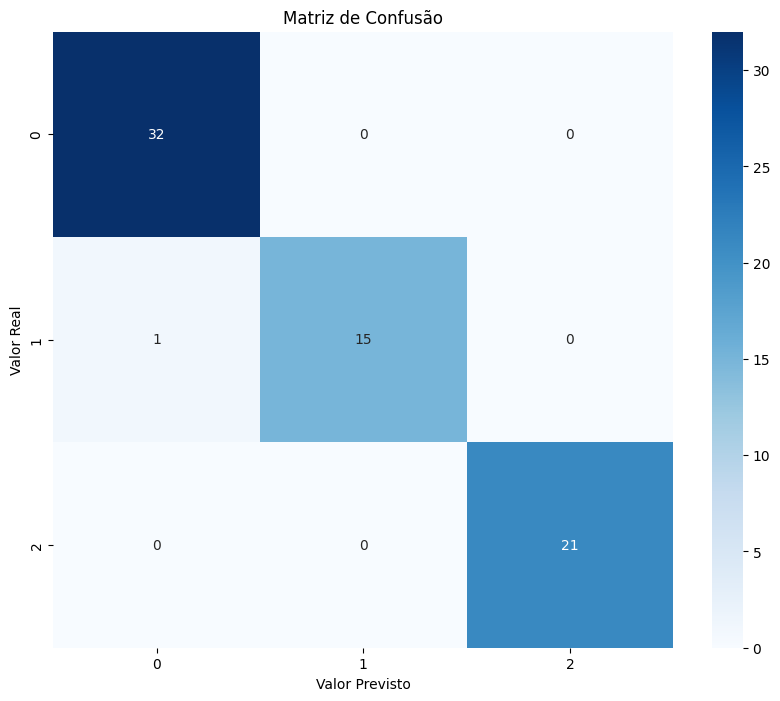

In [16]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

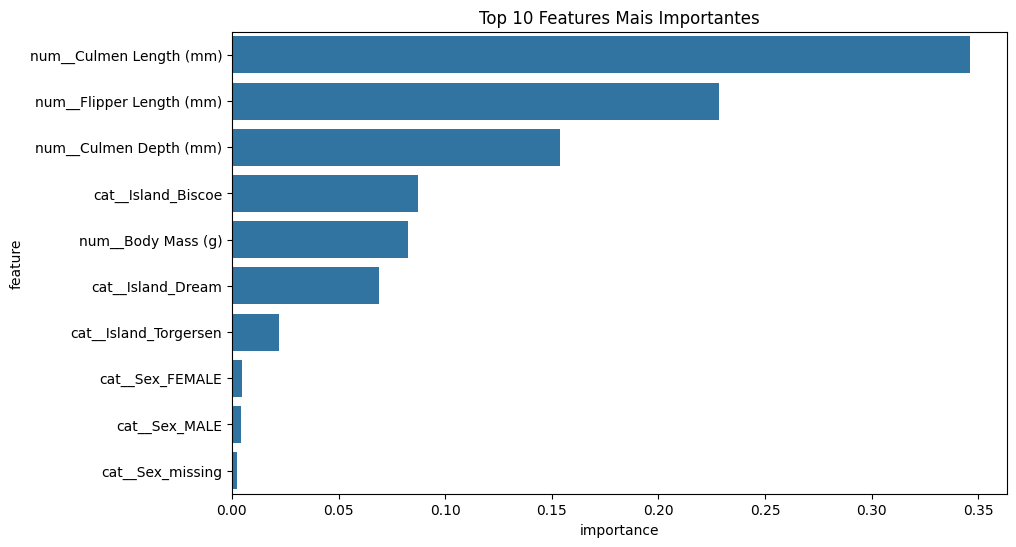

In [17]:
# Importância das features
importances = model.named_steps['classifier'].feature_importances_
feature_names = model.named_steps['preprocessor'].get_feature_names_out()

feature_importance = pd.DataFrame(
    {'feature': feature_names, 'importance': importances})
feature_importance = feature_importance.sort_values(
    'importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Features Mais Importantes')
plt.show()

In [18]:
# Exportar notebook para HTML
!jupyter nbconvert --to html "trabalho/trabalho v1.ipynb"

[NbConvertApp] WARNING | pattern 'trabalho/trabalho v1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--ex